## Caller Incident Impact Analysis (Flag 8)

### Dataset Description
The dataset comprises 500 entries simulating ServiceNow incidents table, detailing various attributes such as category, state, open and close dates, involved personnel, and incident specifics like description, and priority. It captures incident management activities with fields like 'opened_at', 'closed_at', 'assigned_to', 'short_description', and 'priority', reflecting the operational handling and urgency of issues across different locations and categories.


### Your Task
**Goal**: Analyze the imbalance of incident tickets created by human callers, focusing particularly on the caller with increasing incident reports.

**Role**: Resource Manager Analyst

**Difficulty**: 2 out of 5. This task involves in-depth analysis of incident trends related to specific callers, requiring detailed data analysis skills.

**Category**: Incidents Management


### Import Necessary Libraries
This cell imports all necessary libraries required for the analysis. This includes libraries for data manipulation, data visualization, and any specific utilities needed for the tasks. 

In [1]:
import argparse
import pandas as pd
import json
import requests
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from pandas import date_range

## Load Dataset
This cell loads the flag-8 dataset used in the analysis. The dataset is  stored in a CSV file and is imported into a DataFrame. This step includes reading the data from a file path and possibly performing initial observations such as viewing the first 5 rows to ensure it has loaded properly.

In [2]:
dataset_path = "csvs/flag-8.csv"
df = pd.read_csv(dataset_path)
df.head()

,sys_updated_on,assigned_to,caller_id,opened_at,closed_by,number,state,sys_updated_by,closed_at,short_description,assignment_group,priority,category
0,2023-01-17 01:48:47.605837125,Fred Luddy,David Loo,2023-01-02 02:04:00,Charlie Whitherspoon,INC0000000000,Resolved,employee,2023-01-17 01:48:47.605837125,Unable to connect to VPN,Network,2 - High,Network
1,2023-01-05 05:14:35.878097363,Fred Luddy,Bud Richman,2023-01-03 04:22:00,Luke Wilson,INC0000000001,Resolved,employee,2023-01-05 05:14:35.878097363,Internet connectivity issues in the marketing ...,Network,2 - High,Network
2,2023-01-05 01:49:30.958666302,Howard Johnson,Don Goodliffe,2023-01-03 08:33:00,Howard Johnson,INC0000000002,Resolved,admin,2023-01-05 01:49:30.958666302,Cannot access database,Database,1 - Critical,Database
3,2023-01-10 04:02:29.661776234,Howard Johnson,David Loo,2023-01-03 09:47:00,Howard Johnson,INC0000000003,Resolved,admin,2023-01-10 04:02:29.661776234,Email system failure,Network,1 - Critical,Network
4,2023-01-11 16:16:06.330792709,Charlie Whitherspoon,David Loo,2023-01-04 03:23:00,Beth Anglin,INC0000000004,Resolved,employee,2023-01-11 16:16:06.330792709,Email not syncing,Network,3 - Moderate,Software


### **Question 1: What is the overall average number of incidents raised by callers over the recent period?**

#### Plot overall average number of incidents created by each caller
This cell creates a bar plot to visualize the average number of incidents raised by each caller over the recent period, providing insights into the distribution and frequency of incident creation across different callers. By plotting the total incidents reported by each caller, the visualization helps identify if any caller is consistently involved in more incidents than others.

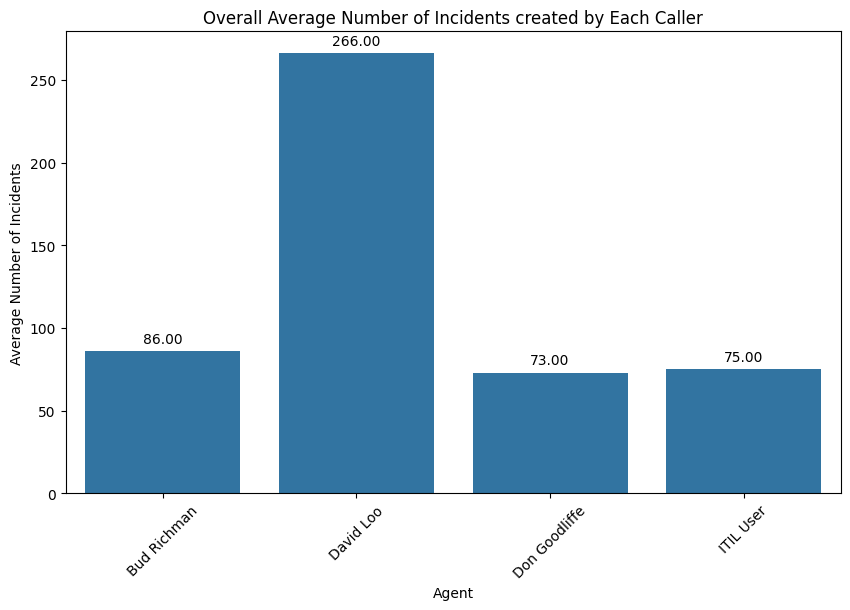

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is already loaded and has the necessary columns
df["opened_at"] = pd.to_datetime(df["opened_at"])

# Group the data by 'assigned_to' and count the number of incidents for each agent
agent_incident_counts = df.groupby('caller_id').size()

# Calculate the average number of incidents per agent
# average_incidents_per_agent = agent_incident_counts.mean()

# Create a DataFrame for plotting
agent_average_df = pd.DataFrame({
    'Agent': agent_incident_counts.index,
    'Average Incidents': agent_incident_counts
})

# Plotting the average number of incidents per agent
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Agent', y='Average Incidents', data=agent_average_df)
plt.title('Overall Average Number of Incidents created by Each Caller')
plt.ylabel('Average Number of Incidents')
plt.xlabel('Agent')
plt.xticks(rotation=45)

# Annotate each bar with its value
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points')
plt.show()

#### Generate JSON Description for the Insight

In [4]:
{
    "data_type": "descriptive",
    "insight": "David Loo has raised a significantly higher number of incidents compared to other callers",
    "insight_value": {
        "caller": "David Loo",
        "number_of_incidents": 266,
        "total_incidents": 500
    },
    "plot": {
        "plot_type": "bar",
        "title": "Overall Average Number of Incidents Raised by Each Caller",
        "x_axis": {
            "name": "Caller",
            "value": ["David Loo", "Bud Richman", "Don Goodliffe", "ITIL User"],
            "description": "This represents the individuals who have reported incidents."
        },
        "y_axis": {
            "name": "Number of Incidents",
            "value": [266, 86, 73, 75],
            "description": "This represents the total number of incidents reported by each caller during the recent period."
        },
        "description": "The bar chart visualizes the number of incidents reported by each caller, highlighting that David Loo has reported a disproportionately high number of incidents, 266 out of a total of 500. This indicates that he may be encountering more issues than typical or could be more diligent in reporting incidents."
    },
    "question": "What is the overall average number of incidents raised by callers over the recent period?",
    "actionable_insight": "Given that David Loo has reported a significantly higher number of incidents, it is crucial to investigate the reasons behind this anomaly. Understanding whether these incidents are due to user errors, system issues, or a lack of training could help in addressing the root causes. Additionally, examining the types of incidents David is reporting may provide insights into potential areas of improvement within the organization's processes or systems. This focused approach could lead to more targeted and effective solutions, potentially reducing the number of incidents and improving operational efficiency."
}

{'data_type': 'descriptive',
 'insight': 'David Loo has raised a significantly higher number of incidents compared to other callers',
 'insight_value': {'caller': 'David Loo',
  'number_of_incidents': 266,
  'total_incidents': 500},
 'plot': {'plot_type': 'bar',
  'title': 'Overall Average Number of Incidents Raised by Each Caller',
  'x_axis': {'name': 'Caller',
   'value': ['David Loo', 'Bud Richman', 'Don Goodliffe', 'ITIL User'],
   'description': 'This represents the individuals who have reported incidents.'},
  'y_axis': {'name': 'Number of Incidents',
   'value': [266, 86, 73, 75],
   'description': 'This represents the total number of incidents reported by each caller during the recent period.'},
  'description': 'The bar chart visualizes the number of incidents reported by each caller, highlighting that David Loo has reported a disproportionately high number of incidents, 266 out of a total of 500. This indicates that he may be encountering more issues than typical or could be

### **Question 2: How do the incident raised by David Loo compare to other agents over the specific same time frame or time period?**

#### Plot number of incidents created over time for each Caller
This cell creates a count plot to visualize the distribution of incident assignments across different callers over time, with a specific focus on comparing David Loo's assignments to those of other callers. The plot provides insights into how incident reporting is distributed among team members over time periods, perhaps allowing for evaluation of consistency and fairness in caller activity. 

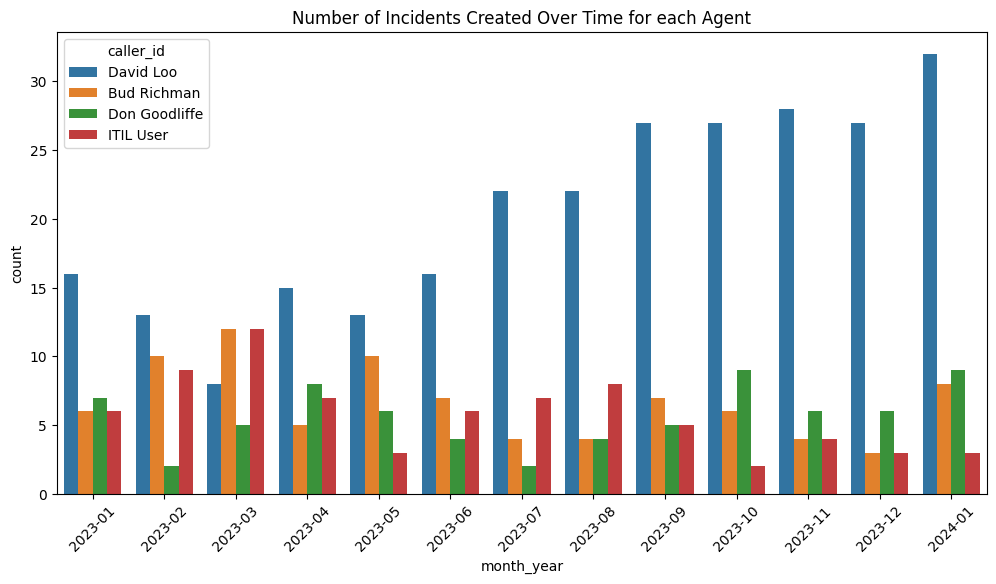

In [5]:
# Sort the DataFrame by the opened_at column
df = df.sort_values("opened_at")
df["opened_at"] = pd.to_datetime(df["opened_at"])
df["closed_at"] = pd.to_datetime(df["closed_at"])
# Create a new column 'month_year' to make the plot more readable
df["month_year"] = df["opened_at"].dt.to_period("M")

# Create a countplot
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x="month_year", hue="caller_id")
plt.title("Number of Incidents Created Over Time for each Agent")
plt.xticks(rotation=45)
plt.show()

#### Generate JSON Description for the Insight

In [12]:
{
    "data_type": "comparative",
    "insight": "David Loo's incidents are significantly higher and show a linear increasing trend over time compared to other callers",
    "insight_value": {
        "caller": "David Loo",
        "trend": "Linear Increase",
        "comparison": "Higher than other callers"
    },
    "plot": {
        "plot_type": "line",
        "title": "Comparison of Incident Numbers Over Time: David Loo vs. Other Callers",
        "x_axis": {
            "name": "Time",
            "value": "Specific time frame analyzed",
            "description": "This axis represents the timeline over which the incident data is analyzed."
        },
        "y_axis": {
            "name": "Number of Incidents",
            "value": "Count of incidents reported",
            "description": "This axis shows the number of incidents reported by each caller over the analyzed period."
        },
        "description": "The line plot illustrates the trend of incidents reported by David Loo compared to other callers over the same time period. It highlights that not only does David Loo have a higher number of incidents, but there is also a noticeable linear increase in his incident reports over time. This trend starkly contrasts with the relatively stable or less significant trends observed for other callers."
    },
    "question": "How do the incidents raised by David Loo compare to other agents over the specific same time frame or time period?",
    "actionable_insight": "The significant and increasing number of incidents reported by David Loo warrants a deeper investigation into the nature of these incidents and his working conditions. It is essential to determine whether these incidents are due to systemic issues, lack of adequate training, or perhaps inefficiencies in the tools or systems he uses. Addressing these factors could help in reducing the number of incidents and improving overall operational efficiency. Moreover, understanding this trend can guide targeted training or system improvements not just for David Loo but potentially for other team members who might face similar issues."}

{'data_type': 'comparative',
 'insight': "David Loo's incidents are significantly higher and show a linear increasing trend over time compared to other callers",
 'insight_value': {'caller': 'David Loo',
  'trend': 'Linear Increase',
  'comparison': 'Higher than other callers'},
 'plot': {'plot_type': 'line',
  'title': 'Comparison of Incident Numbers Over Time: David Loo vs. Other Callers',
  'x_axis': {'name': 'Time',
   'value': 'Specific time frame analyzed',
   'description': 'This axis represents the timeline over which the incident data is analyzed.'},
  'y_axis': {'name': 'Number of Incidents',
   'value': 'Count of incidents reported',
   'description': 'This axis shows the number of incidents reported by each caller over the analyzed period.'},
  'description': 'The line plot illustrates the trend of incidents reported by David Loo compared to other callers over the same time period. It highlights that not only does David Loo have a higher number of incidents, but there is al

### **Question 3: Are there changes in the categories of incidents raised by David Loo over time?**

#### Plot number of incidents created over time by category for David Loo

This cell creates a count plot to visualize how the categories of incidents reported by David Loo have changed over time. By tracking the distribution of incident categories on a monthly basis, the plot provides insights into any shifts in the types of issues David is reporting, which could indicate changes in his role or any emerging issues. 

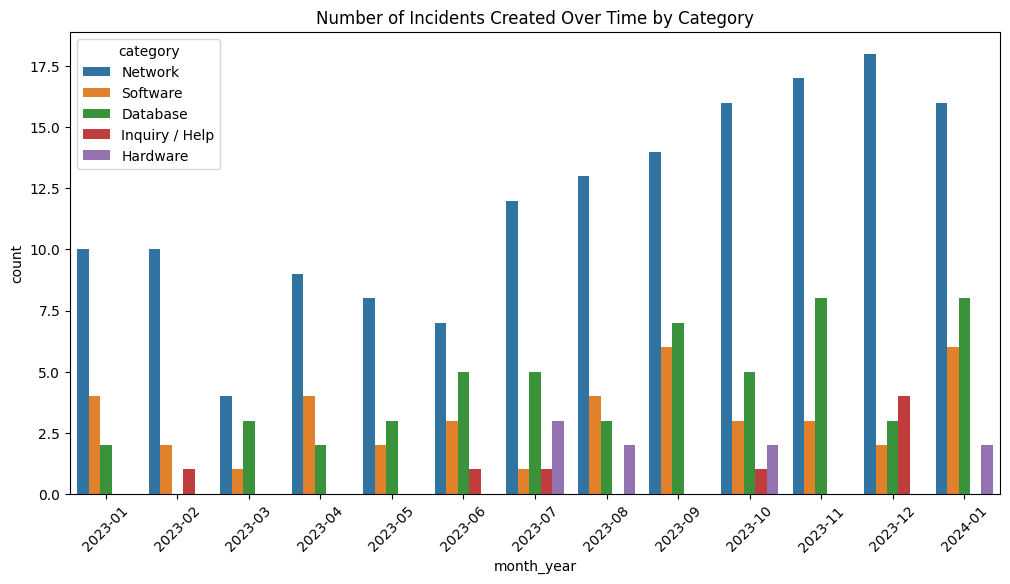

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Put the data into a DataFrame

# Sort the DataFrame by the opened_at column
df = df[df['caller_id'] == 'David Loo']
df = df.sort_values("opened_at")
df["opened_at"] = pd.to_datetime(df["opened_at"])
df["closed_at"] = pd.to_datetime(df["closed_at"])
# Create a new column 'month_year' to make the plot more readable
df["month_year"] = df["opened_at"].dt.to_period("M")

# Create a countplot
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x="month_year", hue="category")
plt.title("Number of Incidents Created Over Time by Category")
plt.xticks(rotation=45)
plt.show()

#### Generate JSON Description for the Insight

In [1]:
{
    "data_type": "diagnostic",
    "insight": "Incidents raised by David Loo are predominantly in the Network category",
    "insight_value": {
        "dominant_category": "Network",
        "proportion": "High and increasing proportion compared to other categories"
    },
    "plot": {
        "plot_type": "bar",
        "title": "Distribution of Incident Categories Raised by David Loo",
        "x_axis": {
            "name": "Incident Category",
            "value": ["Network", "Software", "Hardware", "Inquiry/Help", "Database"],
            "description": "This represents the different categories of incidents handled by David Loo."
        },
        "y_axis": {
            "name": "Number of Incidents",
            "value": "Count of incidents in each category",
            "description": "This shows the number of incidents assigned to each category by David Loo."
        },
        "description": "The bar chart visualizes the distribution of incident categories reported by David Loo, highlighting a significant dominance of incidents in the Network category that are also increasing linearly. This suggests a possible specialization or frequent interaction with network-related issues, which could be a focal point for further investigation."
    },
    "question": "Are there changes in the categories of incidents raised by David Loo over time?",
    "actionable_insight": "Given the high proportion of Network-related incidents reported by David Loo, it may be beneficial to delve deeper into the reasons behind this trend. Understanding whether these incidents stem from systemic issues, specific changes in network infrastructure, or David's role-related responsibilities could help in addressing the root causes. Additionally, providing targeted training or resources to David and possibly other team members involved in network management could reduce the frequency and impact of such incidents. This approach could also help in preemptively managing potential escalations in this category."
}

{'data_type': 'diagnostic',
 'insight': 'Incidents raised by David Loo are predominantly in the Network category',
 'insight_value': {'dominant_category': 'Network',
  'proportion': 'High and increasing proportion compared to other categories'},
 'plot': {'plot_type': 'bar',
  'title': 'Distribution of Incident Categories Raised by David Loo',
  'x_axis': {'name': 'Incident Category',
   'value': ['Network', 'Software', 'Hardware', 'Inquiry/Help', 'Database'],
   'description': 'This represents the different categories of incidents handled by David Loo.'},
  'y_axis': {'name': 'Number of Incidents',
   'value': 'Count of incidents in each category',
   'description': 'This shows the number of incidents assigned to each category by David Loo.'},
  'description': 'The bar chart visualizes the distribution of incident categories reported by David Loo, highlighting a significant dominance of incidents in the Network category that are also increasing linearly. This suggests a possible speci

### **Question-4:** What could be potential consequences of not addressing the anomaly or trend of raising tickets by one employee?


#### Plot projected increase in incident raised by David Loo
Forecasting future trends in incident reporting by David Loo based on past data.
This cell uses linear regression to predict future trends in the number of incidents raised by David Loo, based on historical data up to a specified cutoff-date. By projecting these trends, the plot provides insights into potential future challenges. 

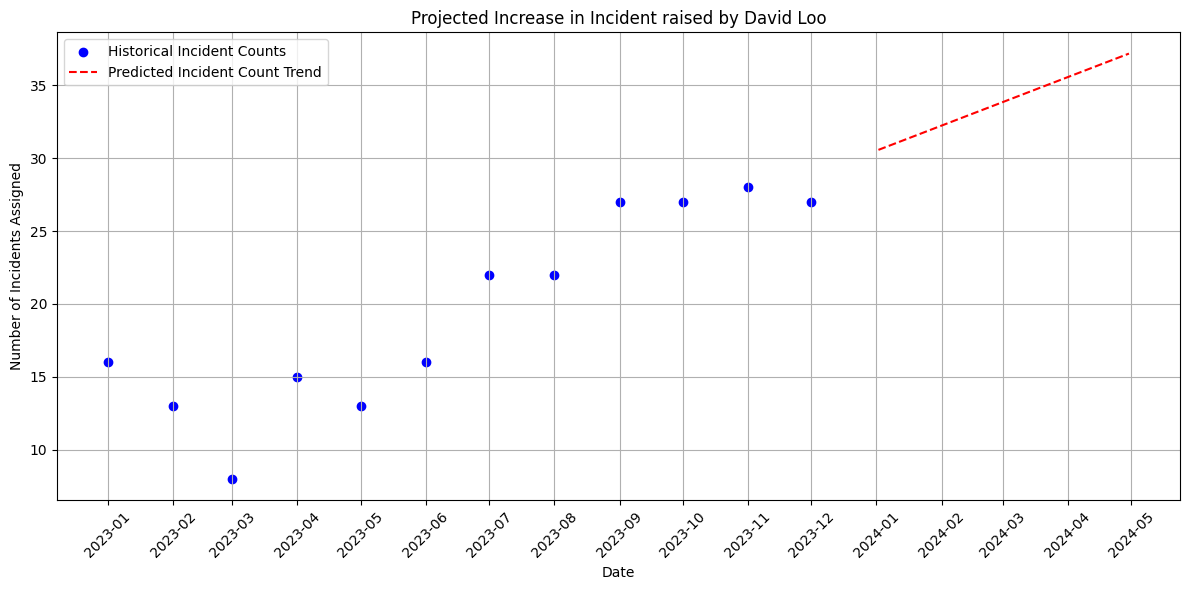

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from sklearn.linear_model import LinearRegression

# Load data
dataset_path = "csvs/flag-8.csv"


# Load the dataset
df = pd.read_csv(dataset_path)
df = df[df['caller_id'] == 'David Loo']
df['opened_at'] = pd.to_datetime(df['opened_at'])

# Define the cutoff date for the training data
cutoff_date = pd.to_datetime("2024-01-01")

# Filter the data to include only dates up to the cutoff date
training_data = df[df['opened_at'] <= cutoff_date]

# Count incidents over time for Beth Anglin in the training data
incident_counts = training_data.groupby(training_data['opened_at'].dt.to_period("M")).size().reset_index(name='counts')
incident_counts['date_ordinal'] = incident_counts['opened_at'].dt.start_time.apply(lambda x: x.toordinal())

# Prepare data for linear regression
X = incident_counts['date_ordinal'].values.reshape(-1, 1)  # Reshape for sklearn
y = incident_counts['counts'].values  # Target variable: number of incidents

# Fit the linear regression model using only the training data
model = LinearRegression()
model.fit(X, y)

# Define the start date for forecasting
forecast_start_date = pd.to_datetime("2024-01-02")

# Generate future dates from the specified start date
future_dates = pd.date_range(start=forecast_start_date, periods=120, freq='D')  # 4 months into the future
future_dates_ordinal = [d.toordinal() for d in future_dates]
future_preds = model.predict(np.array(future_dates_ordinal).reshape(-1, 1))

# Plotting
plt.figure(figsize=(12, 6))
plt.scatter(incident_counts['opened_at'].dt.start_time, y, color='blue', label='Historical Incident Counts')
plt.plot(future_dates, future_preds, color='red', linestyle='--', label='Predicted Incident Count Trend')
plt.title('Projected Increase in Incident raised by David Loo')
plt.xlabel('Date')
plt.ylabel('Number of Incidents Assigned')
plt.legend()
plt.grid(True)

# Formatting the x-axis to make it more readable
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Generate JSON Description for the Insight

In [4]:
{
    "data_type": "predictive",
    "insight": "Continued linear increase in ticket submissions by David Loo",
    "insight_value": {
        "trend": "Linear Increase",
        "prediction": "Ongoing escalation in ticket submissions"
    },
    "description": "The predictive analysis based on the current trend data indicates a continued linear increase in the number of tickets submitted by David Loo. If this trend is not addressed, it could lead to several potential issues, including system overload, resource misallocation, and possible neglect of similar issues affecting other parts of the organization. This increasing trend suggests that underlying systemic issues or inefficiencies might be prompting repeated ticket submissions, which could impact the overall effectiveness and responsiveness of the IT support system.",
    "recommendation": {
        "action": "Implement proactive measures to address the increasing trend of ticket submissions",
        "expected_outcome": "Stabilization of ticket volumes and improved system efficiency",
        "urgency": "High"
    },
    "actionable_insight": "To mitigate the risks associated with the unaddressed increase in ticket submissions by David Loo, it is critical to conduct a thorough investigation into the nature of the tickets and any common underlying causes. Potential actions include enhancing system infrastructure, providing additional training or resources to David Loo, and implementing more robust problem-solving protocols. By addressing the root causes, the organization can prevent potential system overloads and ensure a more balanced workload distribution. Regular monitoring and analysis of ticket submission trends should also be established to quickly identify and address similar anomalies in the future."
}

{'data_type': 'predictive',
 'insight': 'Continued linear increase in ticket submissions by David Loo',
 'insight_value': {'trend': 'Linear Increase',
  'prediction': 'Ongoing escalation in ticket submissions'},
 'description': 'The predictive analysis based on the current trend data indicates a continued linear increase in the number of tickets submitted by David Loo. If this trend is not addressed, it could lead to several potential issues, including system overload, resource misallocation, and possible neglect of similar issues affecting other parts of the organization. This increasing trend suggests that underlying systemic issues or inefficiencies might be prompting repeated ticket submissions, which could impact the overall effectiveness and responsiveness of the IT support system.',
 'recommendation': {'action': 'Implement proactive measures to address the increasing trend of ticket submissions',
  'expected_outcome': 'Stabilization of ticket volumes and improved system efficien

### Summary of Findings (Flag 8)

1. **Increasing Incidents by Caller**: Analysis shows a particular caller is consistently increasing the number of incident assignments over time. This trend points to a potential focal point for incident creation that may require further scrutiny.
2. **Impact on Time to Resolution (TTR)**: Alongside the rise in incident volume from this caller, there is a corresponding increase in the average Time to Resolution (TTR) for these incidents. This pattern suggests that the growing number of incidents may be straining resources, impacting overall resolution efficiency.
3. **Need for Root Cause Analysis**: The consistent increase in incidents reported by this caller could indicate underlying issues that are not being adequately addressed, potentially pointing to larger systemic problems within the operational processes.